# Dow Selection

Topics: Boolean array operators, sum function, where function, plotting.

The array 'dow' is a 2-D array with each row holding the
daily performance of the Dow Jones Industrial Average from the
beginning of 2008 (dates have been removed for exercise simplicity).
The array has the following structure::

       OPEN      HIGH      LOW       CLOSE     VOLUME      ADJ_CLOSE
       13261.82  13338.23  12969.42  13043.96  3452650000  13043.96
       13044.12  13197.43  12968.44  13056.72  3429500000  13056.72
       13046.56  13049.65  12740.51  12800.18  4166000000  12800.18
       12801.15  12984.95  12640.44  12827.49  4221260000  12827.49
       12820.9   12998.11  12511.03  12589.07  4705390000  12589.07
       12590.21  12814.97  12431.53  12735.31  5351030000  12735.31

In [1]:
%matplotlib inline
from numpy import loadtxt, sum, where
import matplotlib.pyplot as plt

In [2]:
# Constants that indicate what data is held in each column of
# the 'dow' array.
OPEN = 0
HIGH = 1
LOW = 2
CLOSE = 3
VOLUME = 4
ADJ_CLOSE = 5

0. The data has been loaded from a .csv file for you.

In [7]:
# 'dow' is our NumPy array that we will manipulate.
dow = loadtxt('dow.csv', delimiter=',')

array([[1.326182e+04, 1.333823e+04, 1.296942e+04, 1.304396e+04,
        3.452650e+09, 1.304396e+04],
       [1.304412e+04, 1.319743e+04, 1.296844e+04, 1.305672e+04,
        3.429500e+09, 1.305672e+04],
       [1.304656e+04, 1.304965e+04, 1.274051e+04, 1.280018e+04,
        4.166000e+09, 1.280018e+04],
       ...,
       [1.141246e+04, 1.157514e+04, 1.134969e+04, 1.150251e+04,
        3.499610e+09, 1.150251e+04],
       [1.149987e+04, 1.175646e+04, 1.149372e+04, 1.171518e+04,
        3.854280e+09, 1.171518e+04],
       [1.171323e+04, 1.173049e+04, 1.150878e+04, 1.154355e+04,
        3.288120e+09, 1.154355e+04]])

1. Create a "mask" array that indicates which rows have a volume
   greater than 5.5 billion.

In [13]:
high_volume_mask = dow[:, VOLUME]  > 5.5e9

2. How many are there?  (hint: use sum).

In [14]:
high_volume_days = sum(high_volume_mask)
print("The dow volume has been above 5.5 billion on" \
      " %d days this year." % high_volume_days)

The dow volume has been above 5.5 billion on 18 days this year.


3. Find the index of every row (or day) where the volume is greater
   than 5.5 billion. hint: look at the `where()` command.

In [20]:
high_vol_index = where(high_volume_mask)[0]
high_vol_index

array([ 12,  13,  15,  51,  54, 123, 125, 129, 131, 132, 134, 135, 136,
       137, 139, 140, 141, 145])

## Bonus

1. Plot the adjusted close for EVERY day in 2008.
2. Now over-plot this plot with a 'red dot' marker for every
   day where the volume was greater than 5.5 billion.

In [54]:
# Create a new plot.
fig = plt.figure(figsize=(20,16))


<Figure size 1440x1152 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

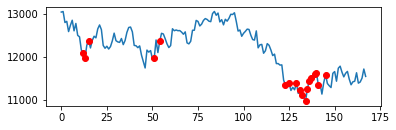

In [56]:
# What is the average volume?
from numpy import mean, std

x_bar = mean(dow[:, VOLUME])
x_bar

4409974107.142858

In [57]:
b = std(dow[:, VOLUME])
b

912206403.7286658

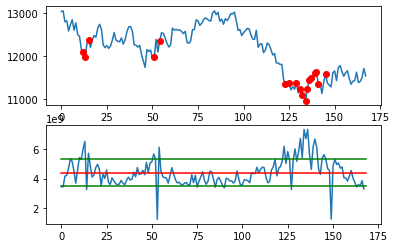

In [63]:
from numpy import linspace, ones



plt.subplot(2,1,1)

# Plot the adjusted close for every day of the year as a line (default)
plt.plot(dow[:, ADJ_CLOSE])

# Plot the days where the volume was high with red dots...
plt.plot(high_vol_index, dow[high_vol_index, ADJ_CLOSE], 'ro')


plt.subplot(2,1,2)

# Plot the adjusted close for every day of the year as a line (default)
plt.plot(dow[:, VOLUME])
plt.plot(linspace(0, len(dow), len(dow)) , ones(len(dow)) * x_bar, 'r')


# plot the two standard deviation envelope
plt.plot(linspace(0, len(dow), len(dow)) , ones(len(dow)) * (x_bar + b), 'g')
plt.plot(linspace(0, len(dow), len(dow)) , ones(len(dow)) * (x_bar - b), 'g')